In [2]:
import pandas as pd

# Load your cleaned data (assumes 'cleaned_text' column exists)
df = pd.read_csv("cleaned_transcripts.csv")
documents = df['cleaned_text'].tolist()


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  # Small, fast & good for topics
embeddings = model.encode(documents, show_progress_bar=True)


C:\Users\Pranay Malhotra\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


In [9]:
reducer = umap.UMAP(
    n_neighbors=15,
    n_components=2,  # <- fix here
    min_dist=0.0,
    metric='cosine'
)

reduced_embeddings = reducer.fit_transform(embeddings)


C:\Users\Pranay Malhotra\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [10]:
min_samples = min(10, len(reduced_embeddings) - 1)  # Safe choice
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=min_samples, metric='euclidean')
cluster_labels = clusterer.fit_predict(reduced_embeddings)

df['topic'] = cluster_labels


C:\Users\Pranay Malhotra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Pranay Malhotra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
min_samples = min(10, len(reduced_embeddings) - 1)  # Safe choice
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=min_samples, metric='euclidean')
cluster_labels = clusterer.fit_predict(reduced_embeddings)

df['topic'] = cluster_labels


C:\Users\Pranay Malhotra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Pranay Malhotra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [12]:
def get_top_n_words(docs, n=10):
    vec = CountVectorizer(stop_words='english')
    X = vec.fit_transform(docs)
    word_freq = np.asarray(X.sum(axis=0)).flatten()
    words = vec.get_feature_names_out()
    top_indices = word_freq.argsort()[::-1][:n]
    return [words[i] for i in top_indices]

topic_keywords = {}
for topic_num in sorted(df['topic'].unique()):
    if topic_num == -1:  # -1 is usually noise
        continue
    topic_docs = df[df['topic'] == topic_num]['cleaned_text'].tolist()
    topic_keywords[topic_num] = get_top_n_words(topic_docs)

# Display topic-wise keywords
for topic, keywords in topic_keywords.items():
    print(f"Topic {topic}: {', '.join(keywords)}")


C:\Users\Pranay Malhotra\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


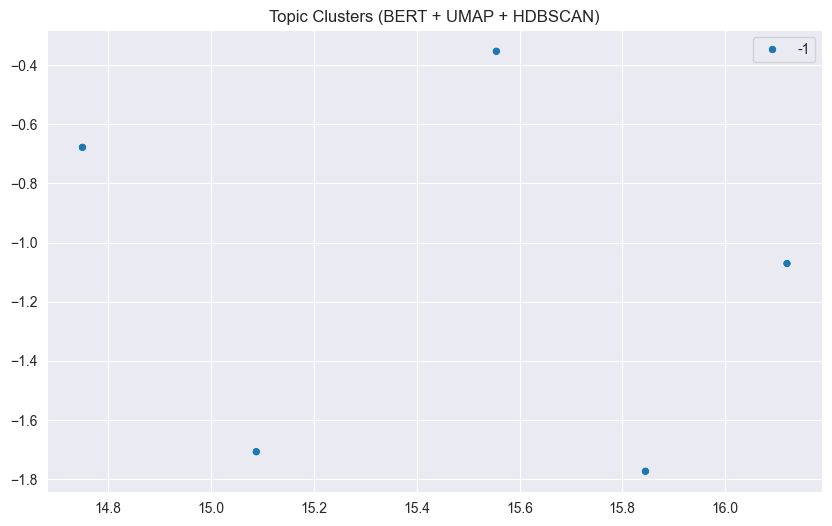

In [15]:
 # Reduce to 2D for visualization
import matplotlib.pyplot as plt
import seaborn as sns
umap_2d = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine')
embedding_2d = umap_2d.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=embedding_2d[:, 0], y=embedding_2d[:, 1],
    hue=cluster_labels,
    palette="tab10",
    legend='full'
)
plt.title("Topic Clusters (BERT + UMAP + HDBSCAN)")
plt.show()
